# Behave folder structure

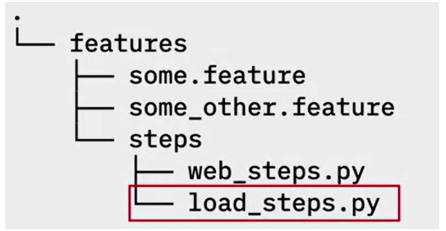

Behave looks for a folder named **“features”**. 
* All of the files that control Behave must be under the top-level **features** folder.
* Inside the **features** folder, Behave looks for files with an extension of `.feature`.
* You can name those files whatever you want.
* You can have multiple feature files or just one.
* Behave will process each one it finds in the **features** folder.

The features folder also contains a subfolder called **“steps”**. 
* Inside the **steps** folder is a collection of Python files that have the steps that match the **Gherkin** statements in the **feature** files.
* It doesn’t matter what you name these steps files, but most people use “`_steps`” in the name to signify that they’re steps files.
* Best practice suggests that you place all of the generic steps that manipulate the web interface, regardless of application, into a file called “`web_steps.py`”. 
* If you have additional Python files containing steps, you could store them in the **steps** folder as well.
* Behave will load all of the steps in the Python files in this folder.
* In this example, I’ve included a file called `load_steps.py`; 
* I usually use this to load sample data to set up the scenarios.

# Feature and steps files

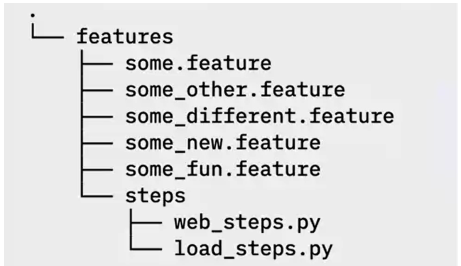

> * *Note that there’s **not a one-to-one correlation between the feature files and the step files**.*
> * *For example, I can have `5` feature files but only two step files.*
> * *As long as the python steps cover all of the statements in the feature files, everything will work.*


# Using Behave

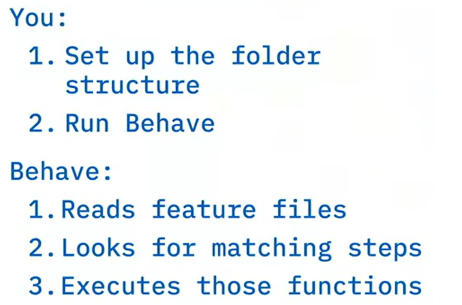

So to use Behave
* First you need to **set up your folder structure correctly**.
* You create your features folder and your feature files, and your steps folder under that for your Python steps files.
* Once your folders and files are set up, you **run the Behave tool from within the parent of that features folder**.
* Behave reads the steps in each feature file, looks for a matching Python step in the steps files, and executes those functions.

# Matching steps

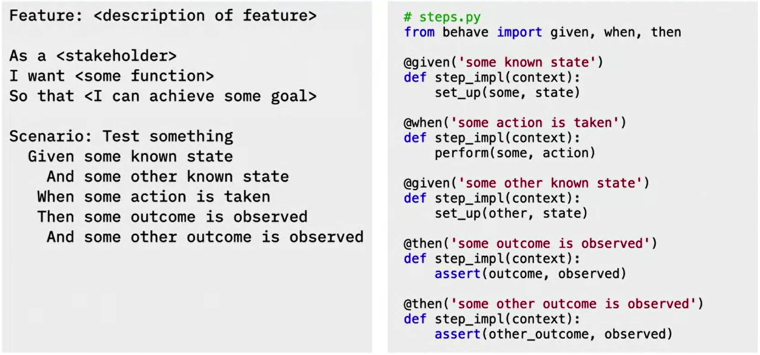

Now let’s look at some sample steps files to see how this step matching happens.
* On the left, you have a **feature** file: This file contains the scenarios that you built with your stakeholders.
* On the right, you have a **steps** file: It contains the Python statements that Behave will match to the feature file.
* Notice that all of the Python functions in this file have the same name: “`step_impl`”
* **Behave will ignore these function names.**
* It only looks for the Python decorators that wrap the functions.

When Behave begins to execute, it scans the **feature** file to find the first scenario.

Then it processes the first sentence of that scenario: “`Given some known state`”. 
* At this point, Behave looks for a Python step that starts with the `Given` keyword and has the text “`some known state`”. 
* Behave finds the step in the `teps.py` file and executes it.

Then Behave looks for the next sentence in the scenario: “`And some other known state`”. 
* Because And comes after a `Given`, Behave will look in the steps file for a Python step that starts with the `Given` keyword and matches the string “`some other known state`”. 
* Behave finds the step and executes it.

***Notice the steps do not have to be in any particular order in the steps file.***

Behave will find them regardless of the order of appearance in the file.

The next sentence in the feature file is “`When some action is taken`”. 
* This time, Behave looks in the steps file for the `When` keyword followed by “`some action is taken`”. 
* It doesn’t match the `Given` or `Then` steps even if they have the same text.
* A `When` in the feature file will only match a `When` in the steps file.
* Behave finds the step and executes it.

Next, Behave processes “`Then some outcome is observed`”. 
* It looks for a `Then` step with the text “`some outcome is observed`” and it executes that function.
* Finally, it processes “`And some other outcome is observed`”. 
* Because the `And` keyword follows the `Then`, Behave looks for a `Then` step with the text “`some other outcome is observed`” and executes it.


# Matching steps summary

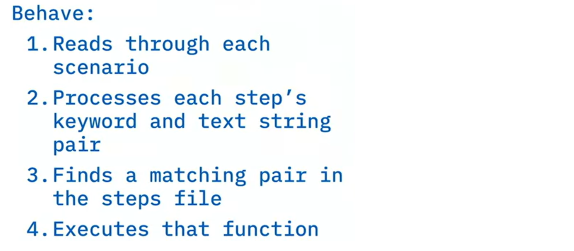

* Behave reads through each scenario of the feature file, step by step.
* It processes each step’s keyword and text string.
* Finds a matching keyword and text string pair in the Python steps file
* It executes that function.